In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [4]:
# Parameter
xname = r"$M_{\nu}$"
xname_hat = r"$\hat{M}_\nu$"
xname_true = r"$M_{\nu, \mathrm{true}}$"
x_true = 0.06
x_lim = 0.8

# 2024_05_24_Wilks_varying_NP_Mnu_m_ncdm_0.06
x_hat1 = np.array([6.680921e-02 , 3.731904e-01 , 1.769066e-02 , 2.348123e-01 , 3.726588e-02 , 7.299251e-03 , 5.402991e-03 , 1.898961e-01 , 6.039603e-02 , 4.228923e-02 , 7.493760e-04 , 4.771538e-01 , 1.017771e-02 , 3.064061e-02 , 4.906053e-03 , 3.892428e-01 , 4.147137e-01 , 1.194280e-01 , 3.767825e-01 , 2.777649e-02 , 2.098037e-04 , 4.771661e-01 , 5.854776e-03 , 5.654594e-02 , 1.564071e-03 , 4.217934e-01 , 1.991518e-03 , 3.630214e-01 , 2.489905e-03 , 4.997219e-01 , 4.997026e-01 , 2.417446e-03 , 9.107300e-04 , 3.257809e-01 , 2.555895e-03 , 4.339557e-01 , 8.460323e-03 , 1.337743e-01 , 4.314674e-04 , 3.814390e-04 , 9.382108e-04 , 3.160036e-01 , 3.690779e-01 , 1.447936e-01 , 2.330366e-03 , 2.862907e-01 , 1.249589e-01 , 3.851761e-01 , 2.623858e-03 , 2.809633e-03 , 4.450915e-01 , 9.446396e-04 , 4.001634e-01 , 2.783728e-03 , 2.145468e-01 , 2.383074e-01 , 2.421979e-01 , 3.563880e-02 , 3.790327e-02 , 1.160815e-01 , 2.857554e-01 , 4.992462e-01 , 3.871426e-01 , 2.782975e-01 , 7.193140e-04 , 3.323276e-04 , 1.038646e-01 , 1.036504e-04 , 1.202151e-01 , 3.592920e-01 , 1.937959e-01 , 1.646099e-01 , 7.920411e-04 , 4.333697e-01 , 4.802346e-04 , 1.007155e-01 , 2.532856e-02 , 1.401855e-02 , 3.831322e-01 , 3.080276e-02 , 2.428100e-01 , 9.124558e-02 , 2.519020e-01 , 7.309046e-04 , 7.778657e-02 , 5.131356e-03 , 1.785787e-03 , 3.967751e-01 , 1.581642e-01 , 2.725865e-01 , 3.998182e-03 , 1.306620e-03 , 2.572641e-04 , 2.601466e-01 , 4.269410e-01 , 1.338344e-03 , 3.663831e-01 , 1.924548e-02 , 2.439833e-03 , 6.295067e-02])
lnL_hat1 = -np.array([332.80, 300.77, 282.25, 345.73, 304.50, 296.69, 290.20, 300.49, 299.95, 331.96, 302.24, 329.21, 305.06, 331.12, 307.28, 322.50, 290.52, 281.79, 312.21, 299.30, 317.43, 298.53, 273.28, 322.23, 330.04, 337.15, 306.25, 299.35, 288.06, 297.47, 301.92, 302.43, 298.95, 278.87, 303.95, 298.72, 292.37, 284.90, 308.37, 317.00, 301.34, 320.70, 290.40, 297.02, 303.92, 303.28, 328.03, 308.69, 298.77, 306.69, 298.96, 330.05, 281.15, 283.25, 297.59, 302.79, 285.19, 297.20, 311.89, 312.07, 314.89, 304.28, 322.97, 300.90, 287.56, 309.00, 292.95, 286.39, 306.43, 284.05, 310.21, 295.53, 315.67, 311.68, 305.39, 313.68, 297.62, 287.80, 318.20, 269.71, 304.27, 268.11, 303.49, 291.13, 330.11, 321.93, 307.69, 279.58, 321.86, 297.70, 333.90, 319.82, 298.49, 292.51, 307.28, 295.10, 267.94, 298.30, 316.09, 291.00])
lnL_tru1 = -np.array([332.81, 301.44, 282.26, 346.12, 304.51, 296.77, 290.29, 300.76, 299.95, 331.96, 302.63, 330.50, 305.08, 331.14, 307.43, 323.14, 291.54, 281.84, 313.19, 299.33, 317.84, 300.39, 273.31, 322.23, 330.06, 338.08, 306.41, 299.94, 288.25, 299.81, 304.66, 302.64, 299.05, 279.35, 304.03, 299.45, 292.42, 284.97, 308.56, 317.18, 301.44, 321.08, 290.97, 297.09, 304.04, 303.68, 328.08, 309.33, 298.92, 307.06, 300.10, 330.44, 281.49, 283.53, 298.02, 303.04, 285.34, 297.22, 311.91, 312.11, 315.01, 305.96, 324.12, 301.14, 287.94, 309.26, 292.98, 286.59, 306.43, 284.74, 310.74, 295.80, 315.73, 312.76, 305.72, 313.72, 297.64, 287.83, 318.88, 269.74, 304.37, 268.13, 303.84, 291.55, 330.12, 321.94, 307.94, 280.84, 322.11, 297.93, 334.02, 320.08, 298.60, 292.83, 307.66, 295.23, 268.89, 298.35, 316.17, 291.00])

# 2024_05_28_Wilks_varying_NP_Mnu_m_ncdm_0.06
x_hat2 = np.array([8.453592e-02 , 3.752013e-01 , 4.342698e-04 , 2.406769e-01 , 3.728376e-02 , 2.872450e-03 , 8.761015e-03 , 1.833761e-01 , 6.704247e-02 , 5.923458e-02 , 9.057004e-04 , 4.999537e-01 , 1.475870e-02 , 1.996084e-02 , 3.806556e-03 , 4.866727e-01 , 4.365363e-01 , 1.227661e-01 , 4.123159e-01 , 3.353378e-02 , 1.475224e-03 , 4.939917e-01 , 9.359048e-03 , 6.829012e-02 , 3.341526e-03 , 4.636709e-01 , 1.044102e-03 , 3.607804e-01 , 1.096416e-03 , 4.999631e-01 , 4.963994e-01 , 1.747506e-03 , 3.412651e-03 , 3.358356e-01 , 3.422932e-03 , 4.982060e-01 , 1.127648e-03 , 1.312190e-01 , 1.749782e-03 , 1.597907e-03 , 1.915272e-04 , 3.221694e-01 , 4.169648e-01 , 1.467937e-01 , 2.110945e-03 , 2.863218e-01 , 1.158817e-01 , 4.333057e-01 , 1.452235e-03 , 3.690549e-03 , 4.994947e-01 , 1.383841e-03 , 4.995665e-01 , 5.020743e-04 , 2.029782e-01 , 2.381397e-01 , 2.223480e-01 , 3.143121e-02 , 1.972547e-02 , 1.203597e-01 , 3.134857e-01 , 4.995992e-01 , 4.183693e-01 , 4.699971e-01 , 6.940642e-04 , 3.126121e-03 , 1.095769e-01 , 3.359625e-03 , 9.704832e-02 , 3.744299e-01 , 1.851263e-01 , 1.632941e-01 , 1.746918e-04 , 4.982099e-01 , 1.758503e-03 , 1.123730e-01 , 2.755028e-02 , 1.664893e-02 , 4.093854e-01 , 2.369700e-02 , 2.416950e-01 , 8.949596e-02 , 2.440164e-01 , 3.703610e-04 , 7.104495e-02 , 3.337109e-02 , 9.663862e-04 , 3.991456e-01 , 1.527739e-01 , 2.970679e-01 , 3.786655e-03 , 2.790629e-04 , 1.500823e-03 , 2.954397e-01 , 4.690743e-01 , 7.425732e-04 , 3.656574e-01 , 1.279155e-02 , 7.261561e-04 , 5.705351e-02])
lnL_hat2 = -np.array([332.81, 300.77, 282.24, 345.73, 304.50, 296.69, 290.20, 300.50, 299.95, 331.96, 302.24, 329.13, 305.06, 331.12, 307.27, 322.30, 290.50, 281.79, 312.20, 299.30, 317.42, 298.52, 273.28, 322.23, 330.04, 337.09, 306.26, 299.35, 288.06, 297.46, 301.93, 302.43, 298.95, 278.87, 303.95, 298.66, 292.37, 284.90, 308.37, 317.00, 301.34, 320.70, 290.38, 297.02, 303.91, 303.27, 328.03, 308.65, 298.77, 306.69, 298.89, 330.05, 281.02, 283.25, 297.59, 302.79, 285.19, 297.21, 311.89, 312.07, 314.89, 304.28, 322.95, 300.68, 287.56, 309.00, 292.95, 286.39, 306.43, 284.05, 310.21, 295.53, 315.67, 311.55, 305.39, 313.68, 297.62, 287.80, 318.16, 269.71, 304.27, 268.11, 303.49, 291.13, 330.08, 321.93, 307.70, 279.59, 321.85, 297.69, 333.89, 319.82, 298.49, 292.51, 307.26, 295.11, 267.93, 298.30, 316.10, 291.00])
lnL_tru2 = -np.array([332.81, 301.44, 282.27, 346.12, 304.51, 296.77, 290.29, 300.76, 299.95, 331.96, 302.63, 330.50, 305.09, 331.13, 307.43, 323.13, 291.54, 281.84, 313.19, 299.33, 317.84, 300.39, 273.31, 322.23, 330.06, 338.08, 306.41, 299.93, 288.26, 299.81, 304.65, 302.64, 299.05, 279.35, 304.03, 299.45, 292.42, 284.97, 308.56, 317.18, 301.44, 321.08, 290.97, 297.09, 304.04, 303.68, 328.08, 309.33, 298.92, 307.06, 300.10, 330.44, 281.48, 283.53, 298.02, 303.05, 285.34, 297.21, 311.92, 312.12, 315.01, 305.96, 324.13, 301.14, 287.94, 309.26, 292.98, 286.59, 306.43, 284.74, 310.74, 295.80, 315.73, 312.76, 305.72, 313.72, 297.64, 287.83, 318.88, 269.74, 304.37, 268.13, 303.84, 291.55, 330.12, 321.94, 307.94, 280.84, 322.10, 297.93, 334.01, 320.08, 298.61, 292.84, 307.66, 295.22, 268.90, 298.35, 316.17, 291.00])

#
x_hat3 = np.array([8.311007e-02 , 3.634719e-01 , 2.588663e-02 , 2.511206e-01 , 3.859931e-02 , 6.967751e-03 , 1.311424e-02 , 1.885265e-01 , 1.282432e-01 , 6.591651e-02 , 1.651880e-03 , 6.305925e-01 , 4.979721e-03 , 2.651732e-02 , 4.671981e-03 , 5.026428e-01 , 4.685933e-01 , 1.085693e-01 , 3.867727e-01 , 3.532083e-02 , 2.499888e-03 , 5.503309e-01 , 5.029085e-03 , 6.011861e-02 , 1.107569e-02 , 4.908245e-01 , 3.173887e-04 , 3.653380e-01 , 3.873506e-04 , 6.479857e-01 , 5.448602e-01 , 2.493201e-03 , 1.215556e-03 , 3.524324e-01 , 4.138742e-03 , 5.714651e-01 , 1.990804e-03 , 1.345749e-01 , 1.070614e-03 , 2.782999e-03 , 2.476905e-03 , 3.177786e-01 , 4.020047e-01 , 1.447282e-01 , 3.668892e-03 , 3.246034e-01 , 1.146846e-01 , 4.680093e-01 , 8.669306e-04 , 1.267171e-03 , 5.578780e-01 , 5.567883e-04 , 5.863068e-01 , 3.185593e-04 , 2.029522e-01 , 2.359968e-01 , 2.288184e-01 , 4.811379e-02 , 2.841458e-02 , 9.915385e-02 , 3.116095e-01 , 6.015331e-01 , 4.090814e-01 , 5.480297e-01 , 1.655175e-03 , 8.179415e-04 , 1.089681e-01 , 2.122467e-03 , 1.038769e-01 , 3.704448e-01 , 1.959652e-01 , 1.654460e-01 , 4.856889e-03 , 5.890113e-01 , 1.795785e-03 , 1.228226e-01 , 3.012851e-02 , 3.857967e-03 , 4.096077e-01 , 3.048546e-02 , 2.373721e-01 , 9.261844e-02 , 2.743890e-01 , 6.101784e-04 , 6.952456e-02 , 4.393993e-02 , 3.316004e-03 , 4.006062e-01 , 1.526330e-01 , 3.089375e-01 , 5.140285e-03 , 6.048626e-04 , 2.859096e-03 , 2.921118e-01 , 5.040477e-01 , 1.086738e-03 , 3.580435e-01 , 3.472407e-03 , 1.829885e-04 , 6.037450e-02])
lnL_hat3 = -np.array([332.81, 300.78, 282.25, 345.73, 304.50, 296.69, 290.21, 300.50, 299.94, 331.96, 302.24, 328.89, 305.06, 331.12, 307.28, 322.30, 290.49, 281.79, 312.20, 299.31, 317.43, 298.49, 273.28, 322.23, 330.04, 337.07, 306.25, 299.35, 288.06, 296.92, 301.88, 302.43, 298.95, 278.87, 303.95, 298.63, 292.38, 284.90, 308.37, 317.00, 301.34, 320.70, 290.38, 297.02, 303.92, 303.27, 328.03, 308.64, 298.76, 306.69, 298.86, 330.05, 280.94, 283.25, 297.59, 302.79, 285.19, 297.20, 311.89, 312.07, 314.89, 304.10, 322.96, 300.58, 287.56, 308.99, 292.95, 286.40, 306.42, 284.05, 310.21, 295.53, 315.67, 311.43, 305.39, 313.68, 297.62, 287.80, 318.16, 269.70, 304.28, 268.11, 303.49, 291.13, 330.11, 321.93, 307.70, 279.59, 321.86, 297.69, 333.90, 319.82, 298.49, 292.51, 307.26, 295.11, 267.94, 298.30, 316.09, 291.00])

# 2024_06_01_Wilks_varying_NP_m_ncdm_0.06
x_hat4 = np.array([0, 3.702795e-01 , 0, 2.418983e-01 , 0, 0, 0, 1.814489e-01 , 0, 0, 0, 7.135109e-01, 0, 0, 0, 5.125870e-01 , 4.761612e-01 , 0, 4.107143e-01, 0, 0, 5.631561e-01, 0, 0, 0, 4.652598e-01, 0, 3.929782e-01 , 2.418997e-03 , 7.147733e-01 , 5.387700e-01 , 0, 0, 3.462969e-01 , 0, 5.688170e-01, 0, 0, 0, 0, 0, 3.449676e-01 , 4.080300e-01, 0, 0, 3.214910e-01, 0, 4.794487e-01, 0, 0, 5.600566e-01, 0, 5.927170e-01, 0, 1.919500e-01 , 2.431200e-01 , 2.270983e-01, 0, 0, 0, 3.150114e-01 , 6.471635e-01 , 4.170417e-01 , 5.800983e-01 , 0, 0, 0, 0, 0, 3.700673e-01 , 1.932218e-01 , 1.664174e-01 , 0, 6.288430e-01 , 0, 0, 0, 0, 4.054575e-01 , 0, 2.426194e-01 , 0, 2.528533e-01 , 0, 0, 0, 0, 3.963219e-01 , 1.592987e-01 , 2.932302e-01 , 0, 0, 0, 2.760667e-01 , 4.954210e-01 , 0, 3.690859e-01 , 0, 0, 0,]) 
lnL_hat4 = -np.array([400, 300.78, 400, 345.73, 400, 400, 400, 300.49, 400, 400, 400, 328.82, 400, 400, 400, 322.30, 290.49, 400, 312.19, 400, 400, 298.49, 400, 400, 400, 337.08, 400, 299.35, 288.06, 296.83, 301.88, 400, 400, 278.87, 400, 298.63, 400, 400, 400, 400, 400, 320.70, 290.38, 400, 400, 303.27, 400, 308.64, 400, 400, 298.85, 400, 280.94, 400, 297.59, 302.78, 285.19, 400, 400, 400, 314.89, 304.06, 322.95, 300.58, 400, 400, 400, 400, 400, 284.04, 310.21, 295.53, 400, 311.40, 400, 400, 400, 400, 318.16, 400, 304.27, 400, 303.49, 400, 400, 400, 400, 279.58, 321.86, 297.69, 400, 400, 400, 292.51, 307.25, 400, 267.93, 400, 400, 400])

# Asimov data set
xs_asimov   =   np.array([0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.20, 0.30, 0.40, 0.50])
chi2_asimov = 2*np.array([0.02, 0.01, 0.00, 0.00, 0.00, 0.01, 0.10, 0.28, 0.54, 0.91])

# Combine
lnL_hat12 = np.maximum(lnL_hat1, lnL_hat2)
lnL_hat34 = np.maximum(lnL_hat3, lnL_hat4)
lnL_hat = np.maximum(lnL_hat12, lnL_hat34)
x_hat12 = np.where(lnL_hat1>lnL_hat2, x_hat1, x_hat2)
x_hat34 = np.where(lnL_hat3>lnL_hat4, x_hat3, x_hat4)
x_hat = np.where(lnL_hat12>lnL_hat34, x_hat12, x_hat34)
lnL_tru = np.maximum(lnL_tru1, lnL_tru2)

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  5.960000000000036


In [5]:
# histogram settings
bin_width = 0.32
bin_max = 8
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = 0.05
x_bins = np.arange(0, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(0, x_true+2*x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [6]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [7]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.05633485032407217
1 sigma:  0.3294762930274409


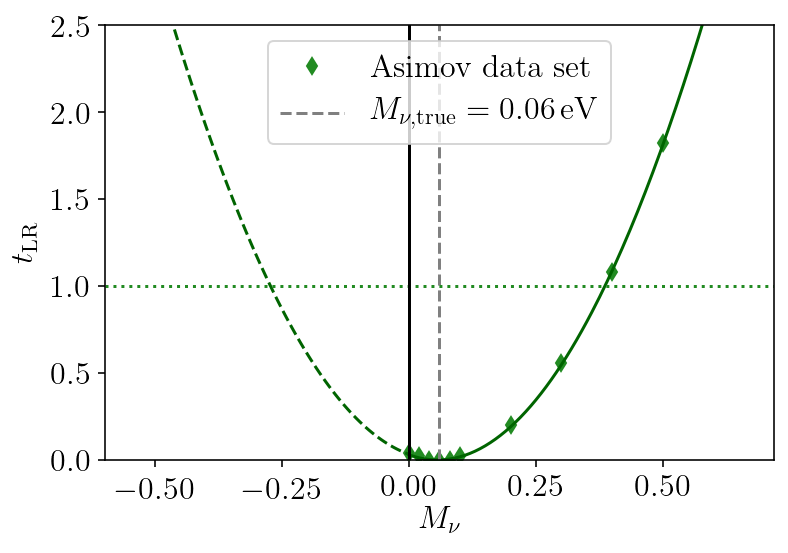

In [8]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.0018, 9.675, 0.059], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[-0.5,0.5])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Set x_lim
x_lim = 2*sigma_asimov

# Extrapolate to negative Mnu
fit_x_extr = np.linspace(-0.6, 0, 100)
fit_y_extr = 1+parabola_min+parabola(fit_x_extr)

# Plot
plt.plot(xs_asimov, chi2_asimov, marker="d", ls="", color="forestgreen", label="Asimov data set")
plt.plot(fit_x, fit_y, color='darkgreen', ls='-')
plt.plot(fit_x_extr, fit_y_extr, color='darkgreen', ls='--')
plt.axvline(x_true, color="grey", ls="--", label=r"$M_{\nu,\mathrm{true}} = 0.06\,$eV")
plt.axhline(1, color="forestgreen", ls=":")
plt.axvline(0, color="black", ls="-")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,2.5])
plt.xlim([x_true-x_lim, x_true+x_lim])
plt.legend()
plt.savefig("PL_asimov_Mnu.pdf", format="PDF", bbox_inches='tight')
plt.show()

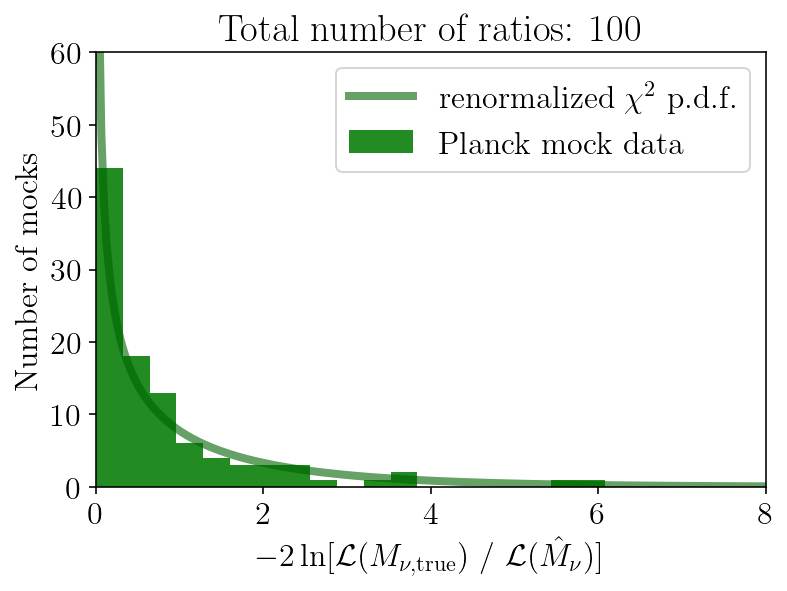

In [9]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="forestgreen", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="darkgreen", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,60])
plt.xlabel(r"$-2\ln[\mathcal{L}$("+xname_true+r") / $\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

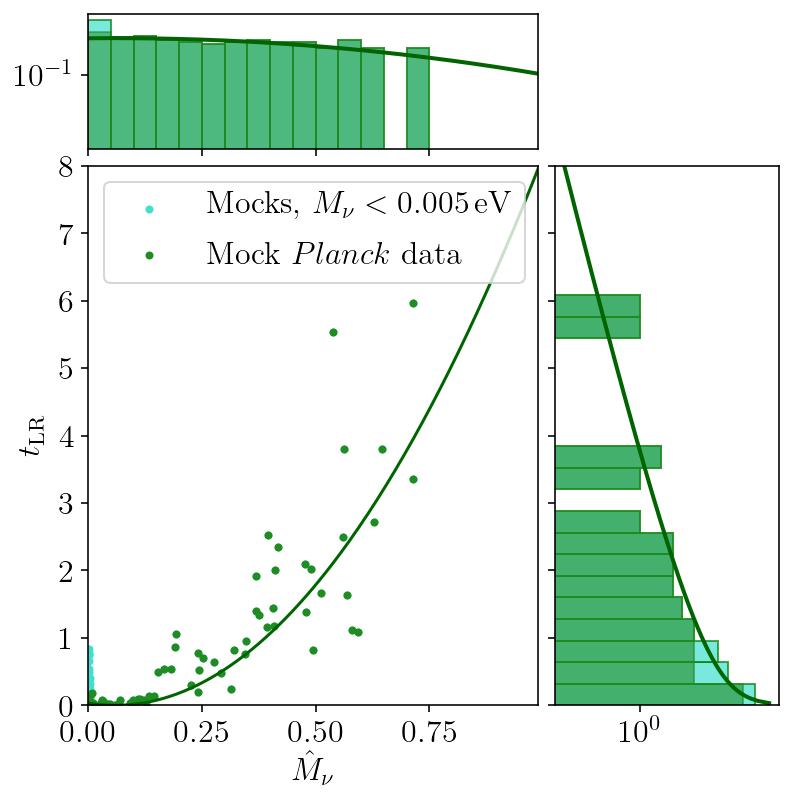

In [11]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="turquoise", marker=".", label=r"Mocks, $M_\nu<0.005\,$eV")
ax.scatter(x_hat[(np.nonzero(0.005<x_hat))], LR[(np.nonzero(0.005<x_hat))], color="forestgreen", marker=".", label=r"Mock ${Planck}$ data")
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='darkgreen', ls='-')
ax.set_xlim([0.0, 3*sigma_asimov])
ax.set_ylim([0,8])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend(loc="upper left")

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="turquoise", alpha=0.7, edgecolor='green')
ax_histx.hist(x_hat[(np.nonzero(0.005<x_hat))], bins=x_bins, color="forestgreen", alpha=0.5, edgecolor='forestgreen')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='darkgreen', lw=2)
ax_histy.set_xscale("log")

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="turquoise", alpha=0.7, edgecolor='green')
ax_histy.hist(LR[(np.nonzero(0.005<x_hat))], bins=bins, orientation='horizontal', color="forestgreen", alpha=0.6, edgecolor='forestgreen')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='darkgreen', lw=2)
ax_histx.set_yscale("log")

plt.savefig("LR_hist_varying_NP_Mnu.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [12]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR_cutoff = 0.779
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

67.0 % of mocks below:  0.779


In [13]:
# Find \Delta\chi^2 for which 95.45% of mocks are below
LR_cutoff = 3.36
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

95.0 % of mocks below:  3.36


In [14]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.3294762930274409
sigma_mocks:  0.2090121510716137
